In [ ]:
# open eye params nc file and check instability

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
from glob import glob
import os
import fnmatch
import dateutil
import cv2
from tqdm import tqdm
from datetime import datetime
import time
import argparse

In [3]:
def find(pattern, path):
    """
    glob for subdirectories
    INPUTS:
        pattern -- str (with * for missing sectiosn of characters) like glob function
        path -- dict to search, including subdirectories
    OUTPUTS:
        result -- list of files
    """
    result = [] # initialize the list as empty
    for root, dirs, files in os.walk(path): # walk though the path directory, and files
        for name in files:  # walk to the file in the directory
            if fnmatch.fnmatch(name,pattern):  # if the file matches the filetype append to list
                result.append(os.path.join(root,name))
    return result # return full list of file of a given type

In [38]:
# old_animal_dir = '/home/niell_lab/Kraken/T/freely_moving_ephys/ephys_recordings/020921/EE12P1RN'
new_animal_dir = '/home/niell_lab/data/freely_moving_ephys/spot_subtraction/020921/EE12P1RNspotsub'
old_animal_dir = '/home/niell_lab/data/freely_moving_ephys/spot_subtraction/020921/EE12P1RN'
old_network_animal_dir = '/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN'

In [39]:
old_nc_list = find('*Reye.nc', old_animal_dir)

In [40]:
new_nc_list = find('*Reye.nc', new_animal_dir)

In [41]:
old_network_nc_list = find('*Reye.nc', old_network_animal_dir)

In [42]:
os.path.split(new_nc_file)[1]

'020921_EE12P1RN_control_Rig2_hf3_gratings_Reye.nc'

In [43]:
old_network_nc_list

['/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN/fm1/020921_EE12P1RN_control_Rig2_fm1_Reye.nc',
 '/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN/hf1_wn/020921_EE12P1RN_control_Rig2_hf1_wn_Reye.nc',
 '/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN/hf2_sprasenoiseflash/020921_EE12P1RN_control_Rig2_hf2_sprasenoiseflash_Reye.nc',
 '/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN/hf3_gratings/020921_EE12P1RN_control_Rig2_hf3_gratings_Reye.nc',
 '/home/niell_lab/Goeppert/nlab-nas/freely_moving_ephys/ephys_recordings/020921/EE12P1RN/hf4_revchecker/020921_EE12P1RN_control_Rig2_hf4_revchecker_Reye.nc']

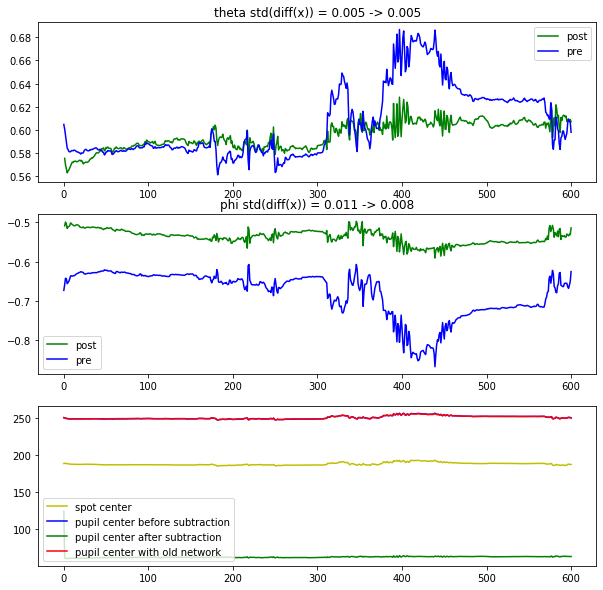

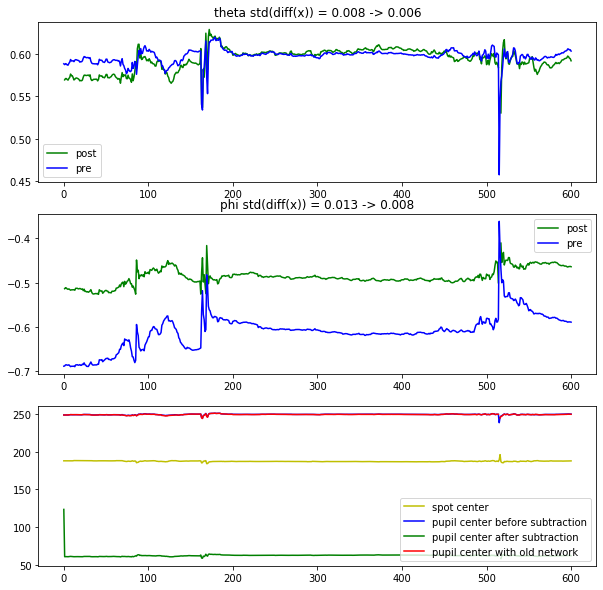

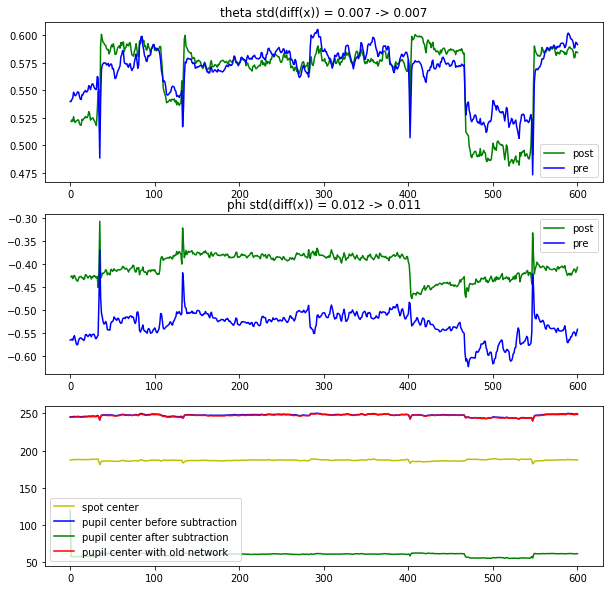

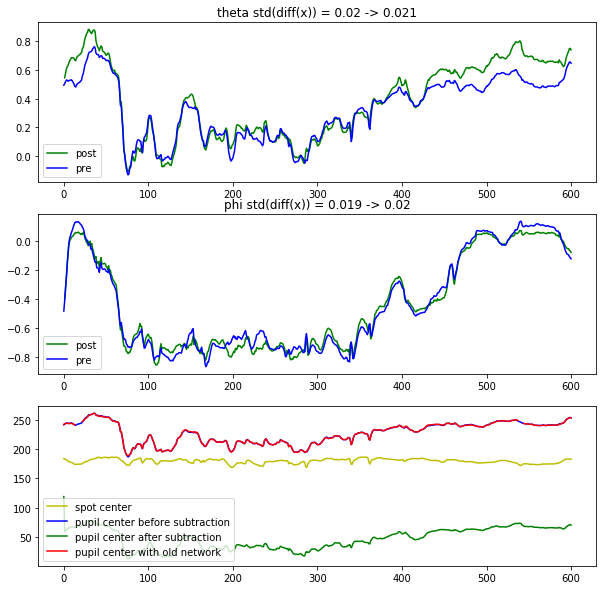

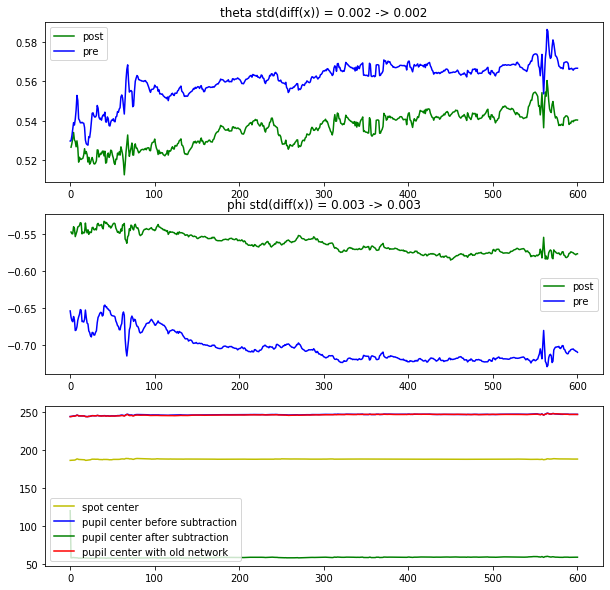

In [46]:
start = 0; stop = 600
for new_nc_file in new_nc_list:
    old_nc_file = [file for file in old_nc_list if os.path.split(new_nc_file)[1] in file][0]
    old_network_nc_file = [file for file in old_network_nc_list if os.path.split(new_nc_file)[1] in file][0]
    new_eye_params = xr.open_dataset(new_nc_file).REYE_ellipse_params.sel(frame=slice(start, stop))
    old_eye_params = xr.open_dataset(old_nc_file).REYE_ellipse_params.sel(frame=slice(start, stop))
    new_eye_pts = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop))
    oldnetwork_eye_params = xr.open_dataset(old_network_nc_file).REYE_ellipse_params.sel(frame=slice(start, stop))
    plt.subplots(3,1, figsize=(10,10))
    plt.subplot(3,1,1)
    plt.plot(new_eye_params.sel(ellipse_params='theta'), 'g')
    plt.plot(old_eye_params.sel(ellipse_params='theta'), 'b')
    plt.legend(['post','pre'])
    plt.title('theta std(diff(x)) = '+str(round(np.std(np.diff(old_eye_params.sel(ellipse_params='theta'))),3))+' -> '+str(round(np.nanstd(np.diff(new_eye_params.sel(ellipse_params='theta'))),3)))
    plt.subplot(3,1,2)
    plt.plot(new_eye_params.sel(ellipse_params='phi'), 'g')
    plt.plot(old_eye_params.sel(ellipse_params='phi'), 'b')
    plt.title('phi std(diff(x)) = '+str(round(np.std(np.diff(old_eye_params.sel(ellipse_params='phi'))),3))+' -> '+str(round(np.nanstd(np.diff(new_eye_params.sel(ellipse_params='phi'))),3)))
    plt.legend(['post','pre'])
    plt.subplot(3,1,3)
    plt.plot(new_eye_pts.sel(point_loc='spot_cent_x'), color='y')
    plt.plot(old_eye_params.sel(ellipse_params='X0'), color='b')
    plt.plot(new_eye_params.sel(ellipse_params='X0'), color='g')
    plt.plot(oldnetwork_eye_params.sel(ellipse_params='X0'), color='r')
    plt.legend(['spot center','pupil center before subtraction', 'pupil center after subtraction', 'pupil center with old network'])
    plt.savefig(os.path.join('/home/niell_lab/Documents/020921_spot_subtraction/', os.path.splitext(os.path.split(new_nc_file)[1])[0]))

In [35]:
new_eye_params.sel(ellipse_params='X0')

<xarray.DataArray 'REYE_ellipse_params' (frame: 601)>
array([244.562153, 244.57976 , 244.765818, ..., 247.42137 , 247.420496,
       247.420885])
Coordinates:
  * frame           (frame) int64 0 1 2 3 4 5 6 ... 594 595 596 597 598 599 600
    timestamps      (frame) float64 ...
    ellipse_params  <U2 'X0'
Attributes:
    cam_center_x:  198.65381848740154
    cam_center_y:  240.80021582586494

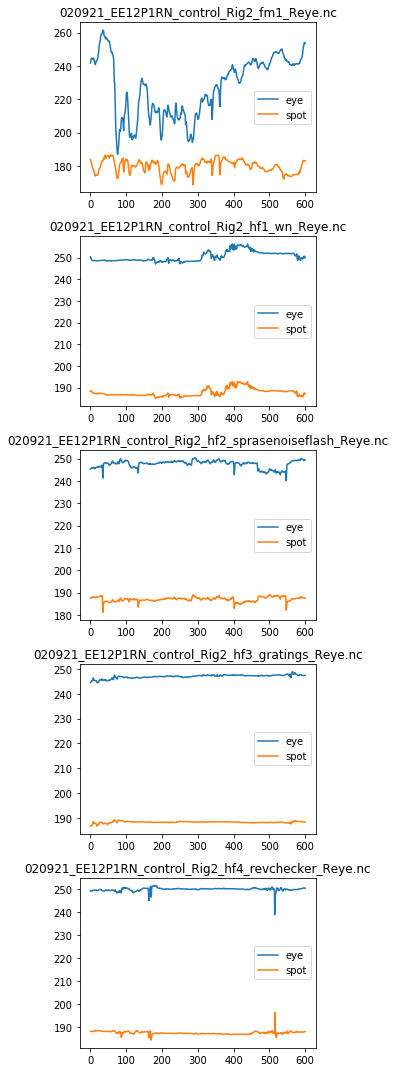

In [16]:
start = 0; stop = 600
plt.subplots(len(new_nc_list),1,figsize=(5,15))
i = 0
for new_nc_file in new_nc_list:
    old_nc_file = [file for file in old_nc_list if os.path.split(new_nc_file)[1] in file][0]
    spotX = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot_cent_x')
    eyeX = xr.open_dataset(old_nc_file).REYE_ellipse_params.sel(frame=slice(start, stop),ellipse_params='X0')
    i = i + 1
    plt.subplot(len(new_nc_list),1,i)
    plt.plot(eyeX)
    plt.plot(spotX)
    plt.title(os.path.split(new_nc_file)[1])
    plt.legend(['eye','spot'])
plt.tight_layout()
# plt.show()
plt.savefig('/home/niell_lab/Documents/figures/040821_spot_subtraction/eye_vs_spot_cent.png')

In [ ]:
start = 3600; stop = 4000
for new_nc_file in new_nc_list:
#     old_nc_file = [file for file in old_nc_list if os.path.split(new_nc_file)[1] in file][0]
    spotcentX = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot_cent_x')
    spot1X = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot1_x')
    spot2X = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot2_x')
    spot3X = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot3_x')
    spot4X = xr.open_dataset(new_nc_file).REYE_pts.sel(frame=slice(start, stop),point_loc='spot4_x')
    spotX = np.mean([spotcentX, spot1X, spot2X, spot3X, spot4X], 0)
    eyeX = xr.open_dataset(new_nc_file).REYE_ellipse_params.sel(frame=slice(start, stop),ellipse_params='X0')
    plt.subplots(1,2, figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(eyeX)
    plt.title('eye cent x')
    plt.subplot(1,2,2)
    plt.plot(spotX)
    plt.title('spot cent x')
    plt.axis('equal')
    plt.savefig(os.path.join('/home/niell_lab/Documents/', 'spotX_vs_eyeX_'+os.path.splitext(os.path.split(new_nc_file)[1])[0]))